In [15]:
import pandas as pd

df = pd.read_csv(r"retail_store_inventory.csv")


In [16]:
print(df.head(10))

         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   
5  2022-01-01     S001      P0006    Groceries  South              138   
6  2022-01-01     S001      P0007    Furniture   East              359   
7  2022-01-01     S001      P0008     Clothing  North              380   
8  2022-01-01     S001      P0009  Electronics   West              183   
9  2022-01-01     S001      P0010         Toys  South              108   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01 

In [17]:
print(df.info())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [18]:
print(df.describe())

       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.00000

In [19]:
#Check null values

print(df.isnull().sum())

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [20]:
#Check duplicates 

print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [21]:
#Fix date type

df['Date'] = pd.to_datetime(df['Date'])

print(df.dtypes)

Date                  datetime64[ns]
Store ID                      object
Product ID                    object
Category                      object
Region                        object
Inventory Level                int64
Units Sold                     int64
Units Ordered                  int64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition             object
Holiday/Promotion              int64
Competitor Pricing           float64
Seasonality                   object
dtype: object


In [22]:
#Check invalid dates

invalid_dates = df[df['Date'].isna()]
print("Invalid Dates:\n", invalid_dates)

Invalid Dates:
 Empty DataFrame
Columns: [Date, Store ID, Product ID, Category, Region, Inventory Level, Units Sold, Units Ordered, Demand Forecast, Price, Discount, Weather Condition, Holiday/Promotion, Competitor Pricing, Seasonality]
Index: []


In [23]:
#Show number of unique values

print(df.nunique())

Date                    731
Store ID                  5
Product ID               20
Category                  5
Region                    4
Inventory Level         451
Units Sold              498
Units Ordered           181
Demand Forecast       31608
Price                  8999
Discount                  5
Weather Condition         4
Holiday/Promotion         2
Competitor Pricing     9751
Seasonality               4
dtype: int64


In [24]:
#Check illogical values 

print(df[df['Units Sold'] < 0])  
print(df[df['Inventory Level'] < 0])

Empty DataFrame
Columns: [Date, Store ID, Product ID, Category, Region, Inventory Level, Units Sold, Units Ordered, Demand Forecast, Price, Discount, Weather Condition, Holiday/Promotion, Competitor Pricing, Seasonality]
Index: []
Empty DataFrame
Columns: [Date, Store ID, Product ID, Category, Region, Inventory Level, Units Sold, Units Ordered, Demand Forecast, Price, Discount, Weather Condition, Holiday/Promotion, Competitor Pricing, Seasonality]
Index: []


In [25]:
#Check outlairs

from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

outliers_z = (z_scores > 3) | (z_scores < -3)

print(df[outliers_z.any(axis=1)])

            Date Store ID Product ID     Category Region  Inventory Level  \
102   2022-01-02     S001      P0003     Clothing  South              488   
138   2022-01-02     S002      P0019         Toys   East              492   
554   2022-01-06     S003      P0015    Furniture  North              490   
750   2022-01-08     S003      P0011    Furniture   East              482   
1512  2022-01-16     S001      P0013    Furniture  South              482   
...          ...      ...        ...          ...    ...              ...   
71558 2023-12-17     S003      P0019     Clothing  South              479   
72126 2023-12-23     S002      P0007    Groceries   West              485   
72485 2023-12-26     S005      P0006    Groceries   West              498   
72884 2023-12-30     S005      P0005    Furniture   East              498   
73060 2024-01-01     S004      P0001  Electronics   East              497   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
102  

In [26]:
#Ensure the data is numeric and normalized, as cosine similarity and clustering require numeric data.

from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
data = df[numeric_cols]

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

print(data_normalized[:5])  # Check the normalized data


[[-3.34515866e-01 -8.68985162e-02 -1.05217166e+00 -5.51444991e-02
  -8.31423497e-01  1.41034990e+00 -9.94624571e-01 -9.71931394e-01]
 [-5.42290284e-01  1.24268237e-01 -8.41754441e-01  2.32970465e-02
   3.02627101e-01  1.41034990e+00 -9.94624571e-01  4.20519506e-01]
 [-1.32721586e+00 -6.56130632e-01 -1.12868701e+00 -6.17598755e-01
  -1.04316930e+00 -1.34216962e-03  1.00540448e+00 -9.09696818e-01]
 [ 1.49697715e+00 -6.92855285e-01  1.03287168e+00 -7.25970739e-01
  -8.61398402e-01 -1.34216962e-03  1.00540448e+00 -7.79118752e-01]
 [-8.34713539e-01 -1.12436995e+00  4.78135380e-01 -1.21034957e+00
   7.11131264e-01 -1.41303424e+00 -9.94624571e-01  5.27043718e-01]]


In [27]:
#cosine 
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cos_sim = cosine_similarity(data_normalized)

# Display the similarity matrix
print(pd.DataFrame(cos_sim))


          0         1         2         3         4         5         6      \
0      1.000000  0.675602  0.392929 -0.162635 -0.328922 -0.446313 -0.198321   
1      0.675602  1.000000 -0.023485 -0.632420 -0.121638  0.082497 -0.694348   
2      0.392929 -0.023485  1.000000  0.054809 -0.023403  0.185463  0.158666   
3     -0.162635 -0.632420  0.054809  1.000000 -0.159004 -0.421510  0.934322   
4     -0.328922 -0.121638 -0.023403 -0.159004  1.000000  0.189306 -0.220104   
...         ...       ...       ...       ...       ...       ...       ...   
73095  0.285899  0.623432  0.075683 -0.293092  0.481705  0.303128 -0.311334   
73096 -0.143143  0.362611 -0.396897 -0.236427  0.656498  0.161887 -0.477752   
73097  0.458567 -0.168456  0.327286  0.507192  0.172793 -0.698221  0.507047   
73098  0.597025  0.662222 -0.194338 -0.412132 -0.633326 -0.290334 -0.508953   
73099 -0.152841  0.187703  0.146514  0.065291  0.290066  0.622449  0.124759   

          7         8         9      ...     73090 

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Data Profiling Report", explorative=True)
profile.to_file("prfiledata.html")

In [13]:
# K-means groups the data into clusters based on their similarities.
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3  # Adjust based on your data

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

# Add cluster labels to the original DataFrame
df["Cluster"] = clusters

print(df.head())


C:\Users\Sherouk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0             Rainy                  0               29.69      Autumn   
1             Su

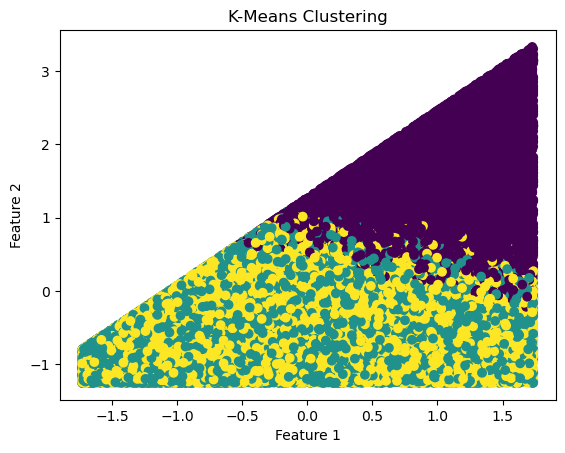

In [14]:
# Visualize Clusters
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=clusters, cmap="viridis")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [15]:

#save plot as photo
plt.savefig("cluster_plot.png")


<Figure size 640x480 with 0 Axes>

In [16]:
#force to show plot
plt.show(block=True)


In [17]:
# regression analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [19]:
regdata= df.drop(columns=['Date', 'Store ID','Product ID','Category','Region','Weather Condition','Holiday/Promotion','Seasonality'])

In [20]:
# Calculate the correlation matrix

correlation_matrix = regdata.corr(method='spearman')


# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    Inventory Level  Units Sold  Units Ordered  \
Inventory Level            1.000000    0.568300       0.001059   
Units Sold                 0.568300    1.000000      -0.000812   
Units Ordered              0.001059   -0.000812       1.000000   
Demand Forecast            0.567097    0.994343      -0.000962   
Price                      0.009136    0.000057       0.004198   
Discount                   0.004933    0.003366      -0.000942   
Competitor Pricing         0.009350    0.000142       0.004510   
Cluster                   -0.456156   -0.597219      -0.000154   

                    Demand Forecast     Price  Discount  Competitor Pricing  \
Inventory Level            0.567097  0.009136  0.004933            0.009350   
Units Sold                 0.994343  0.000057  0.003366            0.000142   
Units Ordered             -0.000962  0.004198 -0.000942            0.004510   
Demand Forecast            1.000000 -0.000071  0.002907           -0.

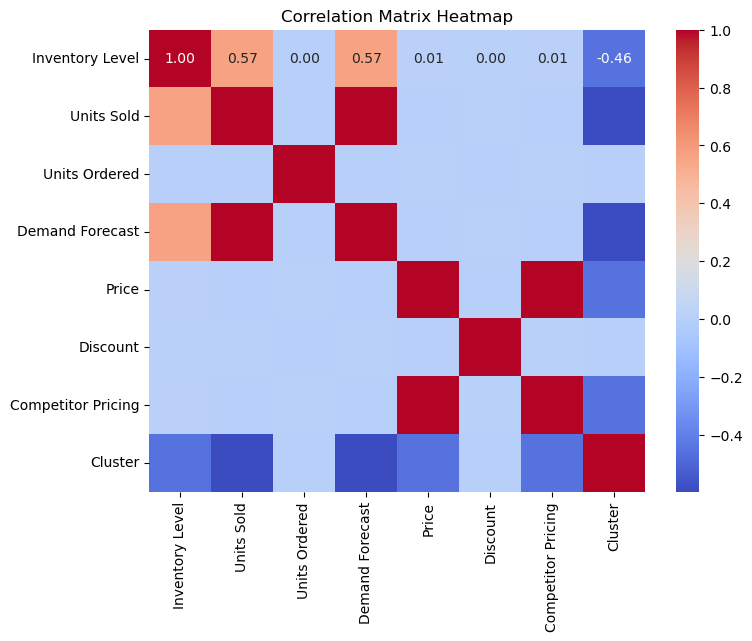

In [21]:

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [22]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X = df[["Inventory Level", "Units Sold", "Units Ordered"]]
X_normalized = scaler.fit_transform(X)
y = df["Demand Forecast"].values.reshape(-1, 1)
y_normalized = scaler.fit_transform(y).ravel()

Mean Squared Error (MSE): 0.00026762246748864824


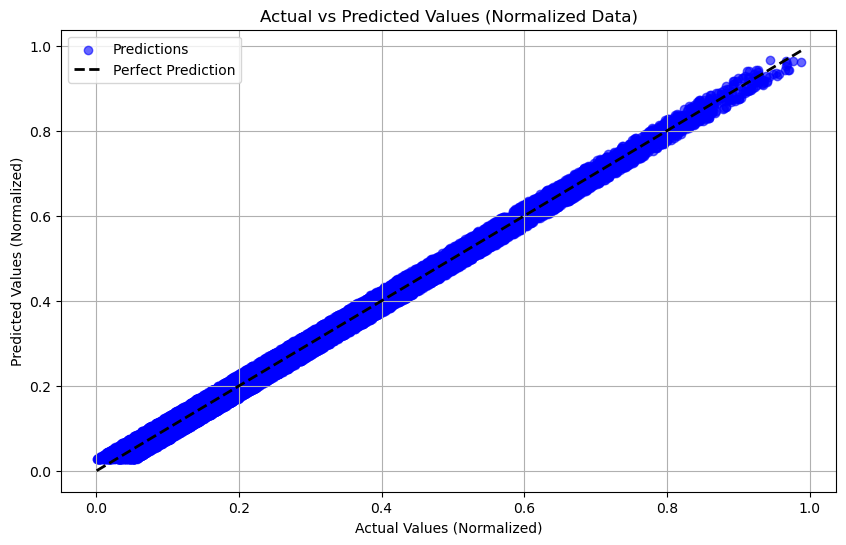

In [23]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Print MSE
print("Mean Squared Error (MSE):", mse)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Values (Normalized)")
plt.ylabel("Predicted Values (Normalized)")
plt.title("Actual vs Predicted Values (Normalized Data)")
plt.legend()
plt.grid(True)
plt.show()


In [24]:

mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, model.predict(X_test))
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

Training MSE: 0.00026871375390754193
Testing MSE: 0.00026762246748864824


In [25]:
#logistic regression

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Define the target variable (categorical) and predictors
df['Units_Sold_High'] = np.where(df['Units Sold'] >= 100, 1, 0)
X = df[['Discount', 'Inventory Level', 'Units Ordered']]
y = df['Units_Sold_High']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize and fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

In [30]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7071135430916553


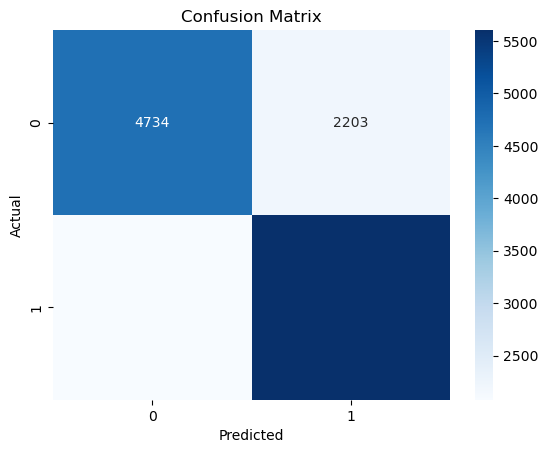

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.69      6937
           1       0.72      0.73      0.72      7683

    accuracy                           0.71     14620
   macro avg       0.71      0.71      0.71     14620
weighted avg       0.71      0.71      0.71     14620



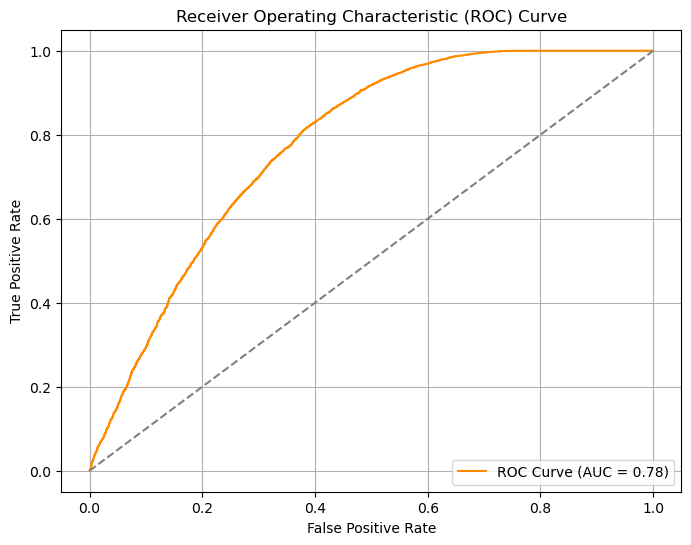

In [33]:
# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
